In [6]:
import numpy as np
import CellModeller
from CellModeller.Simulator import Simulator

In [2]:
model = '/Users/timrudge/cellmodeller/Examples/ex1_simpleGrowth.py'
sim = Simulator(model, 0.025, clPlatformNum=0, clDeviceNum=0, saveOutput=True)

Set up OpenCL context:
  Platform: Apple
  Device: Intel(R) Core(TM) i7-3820QM CPU @ 2.70GHz
Importing model ex1_simpleGrowth
Running in batch mode: no display will be output


/Users/timrudge/anaconda2/envs/cellmodeller/lib/python2.7/site-packages/pyopencl/__init__.py:61: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


In [3]:
# Run the simulation to ~500 cells
while len(sim.cellStates)<500:
    sim.step()

      10           6 cells           3 contacts
   10     6 cells       3 cts       1 iterations  residual = 0.000001
      20           6 cells           3 contacts
   20     6 cells       3 cts       1 iterations  residual = 0.000001
      30           6 cells           3 contacts
   30     6 cells       3 cts       1 iterations  residual = 0.000002
      40           6 cells           3 contacts
   40     6 cells       3 cts       1 iterations  residual = 0.000014
      50          12 cells           9 contacts
   50    12 cells      10 cts       1 iterations  residual = 0.000129
      60          12 cells           9 contacts
   60    12 cells       9 cts       1 iterations  residual = 0.000144
      70          12 cells           9 contacts
   70    12 cells       9 cts       1 iterations  residual = 0.000027
      80          12 cells           9 contacts
   80    12 cells       9 cts       0 iterations  residual = 0.000161
      90          23 cells          20 contacts
   90   

In [7]:
print sim.phys.n_cells
print sim.stepNum

# Make some convenient data arrays from cell properties
cs = sim.cellStates
lengths = np.array([cell.length for (id,cell) in cs.iteritems()])
pos = np.array([cell.pos for (id,cell) in cs.iteritems()])
norm = np.array([cell.dir for (id,cell) in cs.iteritems()])

501
316


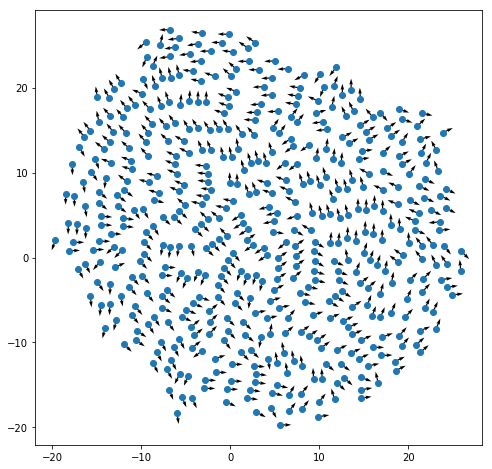

In [57]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Plot the position and orientation of each cell
plt.figure(figsize=(8,8))
plt.plot(pos[:,0], pos[:,1], 'o')
plt.quiver(pos[:,0], pos[:,1], norm[:,0], norm[:,1])

(array([ 12.,  27.,  37.,  55.,  68.,  83.,  80.,  65.,  51.,  23.]),
 array([  0.38418961,   3.14944649,   5.91470337,   8.67996025,
         11.44521713,  14.21047401,  16.9757309 ,  19.74098778,
         22.50624466,  25.27150154,  28.03675842]),
 <a list of 10 Patch objects>)

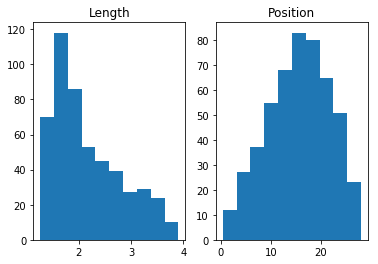

In [13]:
# Plot histograms of some cell properties

# Length
plt.subplot(121)
plt.title('Length')
plt.hist(lengths)

# Distance from origin
plt.subplot(122)
plt.title('Position')
plt.hist(np.sqrt(pos[:,0]**2+pos[:,1]**2))

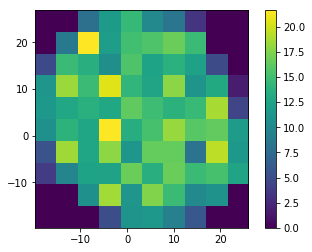

In [58]:
# Compute the cell density in regular bins as a weighted 2d histogram

fig = plt.figure()
H, xedges, yedges = np.histogram2d(pos[:,0], pos[:,1], weights=lengths, bins=10)
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()

In [56]:
# We can also examine the details of the solution, e.g. the overlaps between cells

# Get the physics solver
phys = sim.phys
# Update the contact information
phys.find_contacts()
# Overlap per cell
d = 0.5*phys.ct_dists_dev[0:phys.n_cells,:].get()

# Min and max of overlap
print np.min(d.ravel()), np.max(d.ravel())

-0.0931184 0.0180213
